## This notebook will be mainly used for the capstone project!

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the data

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data Preprocessing

In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 
         'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
         'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 
         'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 
         'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
         'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'] , axis=1 , inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,Overcast,Wet,Daylight
1,1,Block,Sideswipe,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,Overcast,Dry,Daylight
3,1,Block,Other,Clear,Dry,Daylight
4,2,Intersection,Angles,Raining,Wet,Daylight


In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
print("The number of missing samples in 'ADDRTYPE' feature is : " , df['ADDRTYPE'].isnull().sum())
print("The number of missing samples in 'COLLISIONTYPE' feature is : " , df['COLLISIONTYPE'].isnull().sum())
print("The number of missing samples in 'WEATHER' feature is : " , df['WEATHER'].isnull().sum())
print("The number of missing samples in 'ROADCOND' feature is : " , df['ROADCOND'].isnull().sum())
print("The number of missing samples in 'LIGHTCOND' feature is : " , df['LIGHTCOND'].isnull().sum())

The number of missing samples in 'ADDRTYPE' feature is :  1926
The number of missing samples in 'COLLISIONTYPE' feature is :  4904
The number of missing samples in 'WEATHER' feature is :  5081
The number of missing samples in 'ROADCOND' feature is :  5012
The number of missing samples in 'LIGHTCOND' feature is :  5170


In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
print("The number of missing samples in 'ADDRTYPE' feature is : " , df['ADDRTYPE'].isnull().sum())
print("The number of missing samples in 'COLLISIONTYPE' feature is : " , df['COLLISIONTYPE'].isnull().sum())
print("The number of missing samples in 'WEATHER' feature is : " , df['WEATHER'].isnull().sum())
print("The number of missing samples in 'ROADCOND' feature is : " , df['ROADCOND'].isnull().sum())
print("The number of missing samples in 'LIGHTCOND' feature is : " , df['LIGHTCOND'].isnull().sum())

The number of missing samples in 'ADDRTYPE' feature is :  0
The number of missing samples in 'COLLISIONTYPE' feature is :  0
The number of missing samples in 'WEATHER' feature is :  0
The number of missing samples in 'ROADCOND' feature is :  0
The number of missing samples in 'LIGHTCOND' feature is :  0


In [10]:
df['SEVERITYCODE'].value_counts()

1    130634
2     56870
Name: SEVERITYCODE, dtype: int64

Text(0.5, 1.0, 'Target Variable')

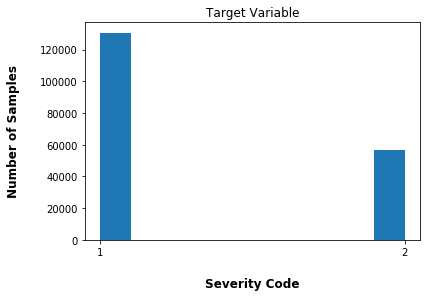

In [12]:
pl = df['SEVERITYCODE'].plot(kind='hist', xticks=[1 , 2])
pl.set_xlabel("Severity Code", labelpad=20, weight='bold', size=12)
pl.set_ylabel("Number of Samples", labelpad=20, weight='bold', size=12)
pl.set_title("Target Variable")

## Inverting categorical features to numerical

In [13]:
LE_Addrress = preprocessing.LabelEncoder()
LE_Addrress.fit(['Block' , 'Intersection' , 'Alley'])
df['ADDRTYPE'] = LE_Addrress.transform(df['ADDRTYPE'])

LE_Coll = preprocessing.LabelEncoder()
LE_Coll.fit(['Parked Car' , 'Angles' , 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
df['COLLISIONTYPE'] = LE_Coll.transform(df['COLLISIONTYPE'])

LE_Wthr = preprocessing.LabelEncoder()
LE_Wthr.fit(['Clear' , 'Raining' , 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 
             'Blowing Sand/Dirt', 'Severe Crosswind' , 'Partly Cloudy'])
df['WEATHER'] = LE_Wthr.transform(df['WEATHER'])

LE_Road = preprocessing.LabelEncoder()
LE_Road.fit(['Dry' , 'Wet' , 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
df['ROADCOND'] = LE_Road.transform(df['ROADCOND'])

LE_Light = preprocessing.LabelEncoder()
LE_Light.fit(['Daylight' , 'Dark - Street Lights On' , 'Unknown', 'Dusk', 'Dawn', 'Dark - No Street Lights', 
              'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
df['LIGHTCOND'] = LE_Light.transform(df['LIGHTCOND'])

df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,0,4,8,5
1,1,1,9,6,8,2
2,1,1,5,4,0,5
3,1,1,4,1,0,5
4,2,2,0,6,8,5


In [14]:
from sklearn.utils import resample
Major = df[df.SEVERITYCODE == 1]
Minor = df[df.SEVERITYCODE == 2]
De_sample = resample(Major , replace = False, n_samples = 56870 , random_state = 7) 
Balanced_df = pd.concat([De_sample , Minor])
Balanced_df['SEVERITYCODE'].value_counts()

2    56870
1    56870
Name: SEVERITYCODE, dtype: int64

Text(0.5, 1.0, 'Target Variable')

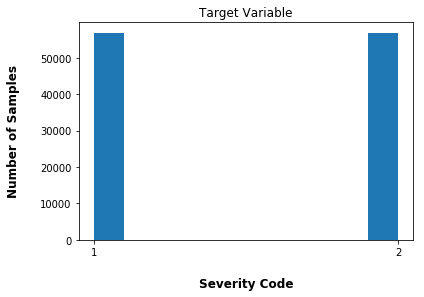

In [15]:
pl = Balanced_df['SEVERITYCODE'].plot(kind='hist', xticks=[1 , 2])
pl.set_xlabel("Severity Code", labelpad=20, weight='bold', size=12)
pl.set_ylabel("Number of Samples", labelpad=20, weight='bold', size=12)
pl.set_title("Target Variable")

## Exploratory Data Analysis

In [16]:
Raw_DF = df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [17]:
Raw_DF.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 
         'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
         'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 
         'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 
         'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
         'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'] , axis=1 , inplace=True)

Raw_DF.dropna(axis=0, inplace=True)

In [18]:
Major = Raw_DF[Raw_DF.SEVERITYCODE == 1]
Minor = Raw_DF[Raw_DF.SEVERITYCODE == 2]
De_sample = resample(Major , replace = False, n_samples = 56870 , random_state = 7) 
Balanced_Raw_DF = pd.concat([De_sample , Minor])
#Balanced_Raw_DF['SEVERITYCODE'].value_counts()

In [19]:
Balanced_Raw_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113740 entries, 182293 to 194671
Data columns (total 6 columns):
SEVERITYCODE     113740 non-null int64
ADDRTYPE         113740 non-null object
COLLISIONTYPE    113740 non-null object
WEATHER          113740 non-null object
ROADCOND         113740 non-null object
LIGHTCOND        113740 non-null object
dtypes: int64(1), object(5)
memory usage: 6.1+ MB


In [20]:
Balanced_Raw_DF.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
182293,1,Block,Sideswipe,Clear,Dry,Daylight
139226,1,Block,Parked Car,Raining,Wet,Dark - Street Lights On
29686,1,Block,Rear Ended,Clear,Dry,Daylight
39477,1,Block,Other,Overcast,Dry,Daylight
85617,1,Block,Parked Car,Unknown,Unknown,Unknown


[Text(0, 0, 'Block'), Text(0, 0, 'Intersection'), Text(0, 0, 'Alley')]

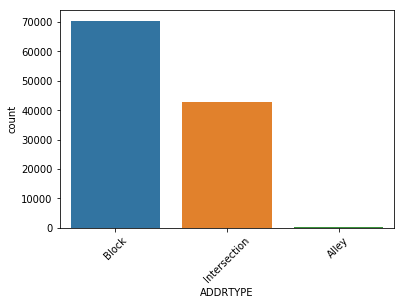

In [21]:
Fig1 = sns.countplot(Balanced_Raw_DF["ADDRTYPE"])
Fig1.set_xticklabels(Fig1.get_xticklabels(), rotation=45)

[Text(0, 0, 'Sideswipe'),
 Text(0, 0, 'Parked Car'),
 Text(0, 0, 'Rear Ended'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Angles'),
 Text(0, 0, 'Right Turn'),
 Text(0, 0, 'Left Turn'),
 Text(0, 0, 'Head On'),
 Text(0, 0, 'Cycles'),
 Text(0, 0, 'Pedestrian')]

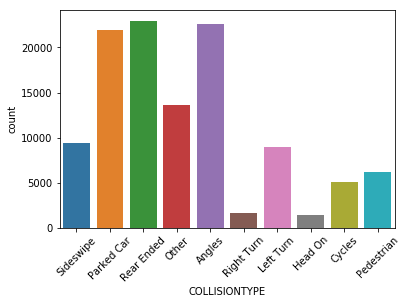

In [22]:
Fig2 = sns.countplot(Balanced_Raw_DF["COLLISIONTYPE"])
Fig2.set_xticklabels(Fig2.get_xticklabels(), rotation=45)

[Text(0, 0, 'Clear'),
 Text(0, 0, 'Raining'),
 Text(0, 0, 'Overcast'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Fog/Smog/Smoke'),
 Text(0, 0, 'Snowing'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Sleet/Hail/Freezing Rain'),
 Text(0, 0, 'Severe Crosswind'),
 Text(0, 0, 'Blowing Sand/Dirt'),
 Text(0, 0, 'Partly Cloudy')]

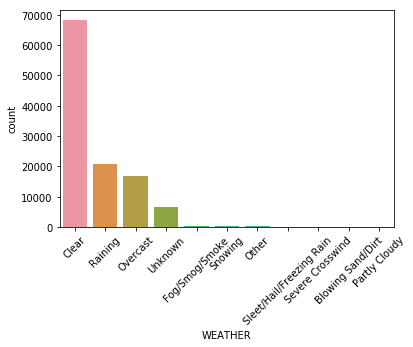

In [23]:
Fig3 = sns.countplot(Balanced_Raw_DF["WEATHER"])
Fig3.set_xticklabels(Fig3.get_xticklabels(), rotation=45)

[Text(0, 0, 'Dry'),
 Text(0, 0, 'Wet'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Snow/Slush'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Sand/Mud/Dirt'),
 Text(0, 0, 'Oil'),
 Text(0, 0, 'Standing Water')]

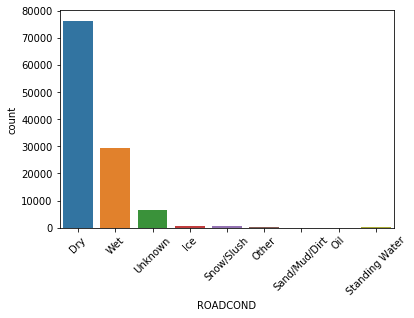

In [24]:
Fig4 = sns.countplot(Balanced_Raw_DF["ROADCOND"])
Fig4.set_xticklabels(Fig4.get_xticklabels(), rotation=45)

[Text(0, 0, 'Daylight'),
 Text(0, 0, 'Dark - Street Lights On'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Dusk'),
 Text(0, 0, 'Dawn'),
 Text(0, 0, 'Dark - No Street Lights'),
 Text(0, 0, 'Dark - Street Lights Off'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dark - Unknown Lighting')]

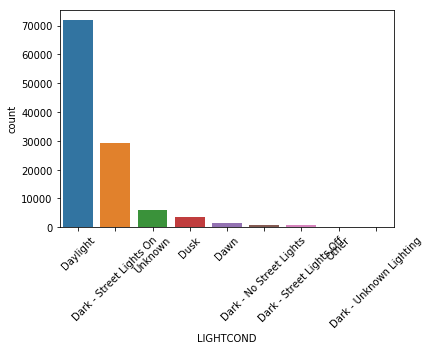

In [25]:
Fig5 = sns.countplot(Balanced_Raw_DF["LIGHTCOND"])
Fig5.set_xticklabels(Fig5.get_xticklabels(), rotation=45)

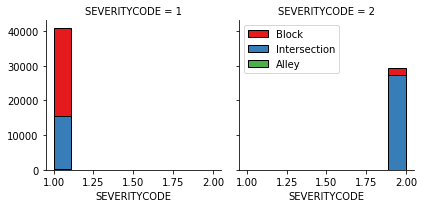

In [26]:
bins = np.linspace(Balanced_Raw_DF.SEVERITYCODE.min(), Balanced_Raw_DF.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(Balanced_Raw_DF , col="SEVERITYCODE", hue="ADDRTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

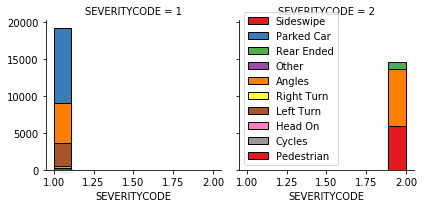

In [27]:
bins = np.linspace(Balanced_Raw_DF.SEVERITYCODE.min(), Balanced_Raw_DF.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(Balanced_Raw_DF , col="SEVERITYCODE", hue="COLLISIONTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

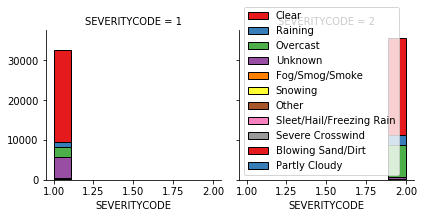

In [28]:

bins = np.linspace(Balanced_Raw_DF.SEVERITYCODE.min(), Balanced_Raw_DF.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(Balanced_Raw_DF , col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

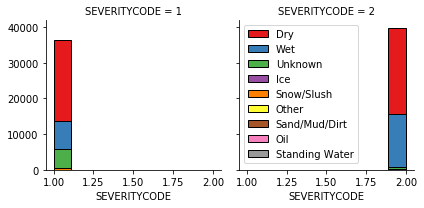

In [29]:
bins = np.linspace(Balanced_Raw_DF.SEVERITYCODE.min(), Balanced_Raw_DF.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(Balanced_Raw_DF , col="SEVERITYCODE", hue="ROADCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

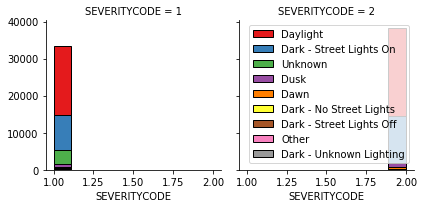

In [30]:
bins = np.linspace(Balanced_Raw_DF.SEVERITYCODE.min(), Balanced_Raw_DF.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(Balanced_Raw_DF , col="SEVERITYCODE", hue="LIGHTCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Normalize the data

In [31]:
Balanced_df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
182293,1,1,9,1,0,5
139226,1,1,5,6,8,2
29686,1,1,7,1,0,5
39477,1,1,4,4,0,5
85617,1,1,5,10,7,8


In [32]:
X = Balanced_df[['ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = Balanced_df['SEVERITYCODE']

In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


## Train_Test_Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [35]:
X_train2, X_eval, y_train2, y_eval = train_test_split(X_train, y_train, test_size = 0.2, random_state = 7)

## Model Developement

### KNN

In [36]:
# Choosing the best k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [46]:
Ks = 15
mean_acc = np.zeros((Ks))

for n in range(1 , Ks): 
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train2 , y_train2)
    yhat = KNN.predict(X_eval)
    mean_acc[n] = metrics.accuracy_score(y_eval, yhat)
    
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.6838837298752679 with k = 10


Text(0, 0.5, 'accuracy')

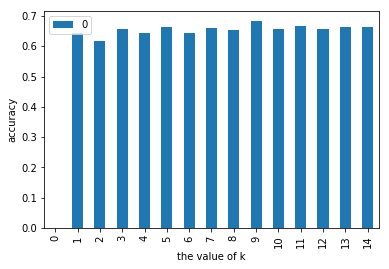

In [47]:
pd.DataFrame(mean_acc).plot(kind='bar')
plt.xlabel("the value of k")
plt.ylabel("accuracy")

In [48]:
KNN = KNeighborsClassifier(n_neighbors = 9).fit(X_train2 , y_train2)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

Depths = 6
mean_acc = np.zeros((Depths))

for n in range(1 , Depths): 
    DT = DecisionTreeClassifier(criterion="entropy" , max_depth=n).fit(X_train2 , y_train2)
    yhat = DT.predict(X_eval)
    mean_acc[n] = metrics.accuracy_score(y_eval, yhat)
    
mean_acc

array([0.        , 0.60574757, 0.64778285, 0.68915874, 0.7062476 ,
       0.70663223])

Text(0, 0.5, 'accuracy')

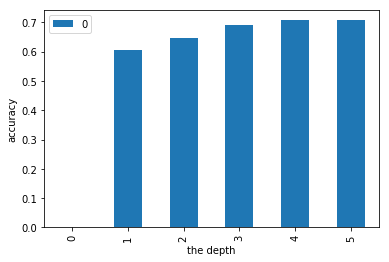

In [50]:
pd.DataFrame(mean_acc).plot(kind='bar')
plt.xlabel("the depth")
plt.ylabel("accuracy")

In [51]:
# Building the Decision tree model with max_depth=5
DT = DecisionTreeClassifier(criterion="entropy" , max_depth=5).fit(X_train2 , y_train2)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [53]:
# Choosing the solver type
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    LR = LogisticRegression(C = 0.01, solver = k).fit(X_train2, y_train2)
    y_prob = LR.predict_proba(X_eval)
    print('Solver: {} -------> LogLoss = {}'.format(k, log_loss(y_eval, y_prob)))

Solver: lbfgs -------> LogLoss = 0.6588411720291505
Solver: saga -------> LogLoss = 0.6588408263885294
Solver: liblinear -------> LogLoss = 0.6588411836776573
Solver: newton-cg -------> LogLoss = 0.6588411864198994
Solver: sag -------> LogLoss = 0.6588410651366802


In [54]:
# Building the Logistic Regression model with solver = "liblinear"
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train2, y_train2)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Model Evaluation using Test set

In [55]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [56]:
# Jaccard index

# KNN
knn_yhat = KNN.predict(X_test)
jacc_KNN = round(jaccard_similarity_score(y_test, knn_yhat), 2)

# Decision Tree
dt_yhat = DT.predict(X_test)
jacc_DT = round(jaccard_similarity_score(y_test, dt_yhat), 2)

# Logistic Regression
lr_yhat = LR.predict(X_test)
jacc_LR = round(jaccard_similarity_score(y_test, lr_yhat), 2)

Jaccard_Values = [jacc_KNN, jacc_DT, jacc_LR]
Jaccard_Values

[0.68, 0.7, 0.6]

In [57]:
# F1_score

# KNN
knn_yhat = KNN.predict(X_test)
F1_KNN = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = DT.predict(X_test)
F1_DT = round(f1_score(y_test, dt_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = LR.predict(X_test)
F1_LR = round(f1_score(y_test, lr_yhat, average = 'weighted'), 2)

F1_Score_Values = [F1_KNN, F1_DT, F1_LR]
F1_Score_Values

[0.68, 0.7, 0.6]

In [58]:
columns = ['KNN', 'Decision Tree', 'Logistic Regression']
index = ["Jaccard", "F1-Score"]

Accuracy_Table = pd.DataFrame([Jaccard_Values, F1_Score_Values], index = index, columns = columns)
Accuracy_Table = Accuracy_Table.transpose()
Accuracy_Table.columns.name = 'Algorithm'
Accuracy_Table

Algorithm,Jaccard,F1-Score
KNN,0.68,0.68
Decision Tree,0.70,0.70
Logistic Regression,0.60,0.60
